In [13]:
%cd /content
!rm -rf yolov5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt
!pip install roboflow
from roboflow import Roboflow

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 17771, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 17771 (delta 95), reused 54 (delta 54), pack-reused 17616 (from 2)
Receiving objects: 100% (17771/17771), 17.13 MiB | 46.54 MiB/s, done.
Resolving deltas: 100% (12073/12073), done.
/content/yolov5


In [14]:
rf = Roboflow(api_key="r5QTR45EghQWBDqU9udL")
project = rf.workspace("archaeology").project("artifacts-z1lar")
version = project.version(3)
dataset = version.download("yolov5")
!ls Artifacts-3

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Artifacts-3 in yolov5pytorch:: 100%|██████████| 96/96 [00:00<00:00, 11779.68it/s]


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [15]:

# 3️⃣ Train YOLOv5
!python train.py \
  --img 416 \
  --batch 8 \
  --epochs 50 \
  --data /content/yolov5/Artifacts-3/data.yaml \
  --weights yolov5s.pt \
  --name artifact_yolov5 \
  --project runs/train \
  --exist-ok



train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Artifacts-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=8, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=artifact_yolov5, exist_ok=True, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-453-geed9bc19 Python-3.12.12 torch-2.9.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw

In [16]:
!python detect.py \
  --weights runs/train/artifact_yolov5/weights/best.pt \
  --img 416 \
  --conf 0.25 \
  --source /content/yolov5/Artifacts-3/valid/images \
  --project runs/detect \
  --name artifact_results \
  --exist-ok


detect: weights=['runs/train/artifact_yolov5/weights/best.pt'], source=/content/yolov5/Artifacts-3/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=artifact_results, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-453-geed9bc19 Python-3.12.12 torch-2.9.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 /content/yolov5/Artifacts-3/valid/images/sherd--13-_JPG_jpg.rf.a14c0b58c8891b60effc9face5fb5818.jpg: 416x416 1 pieces, 109.7ms
image 2/8 /content/yolov5/Artifacts-3/valid/images/sherd--15-_JPG_jpg.rf.19b89cd2f94aee872e1e1cc82037d0f9.jpg: 416x416 1 pieces, 103.8ms
image 3/8 /content/yo

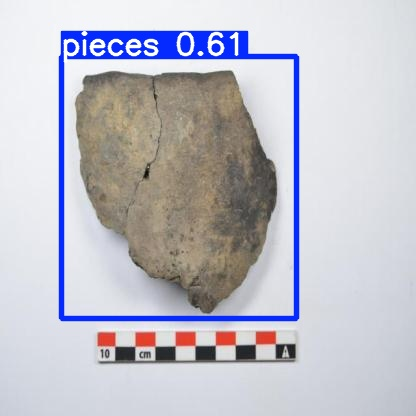

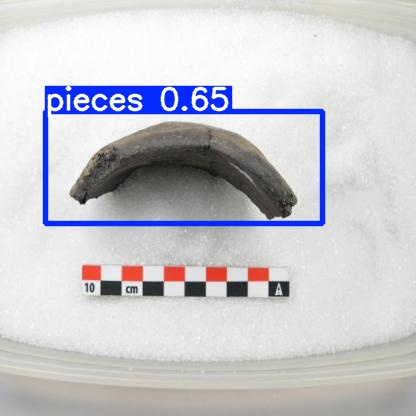

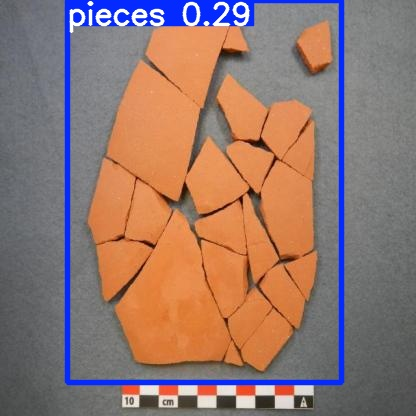

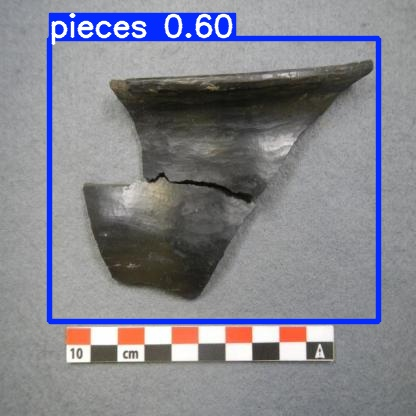

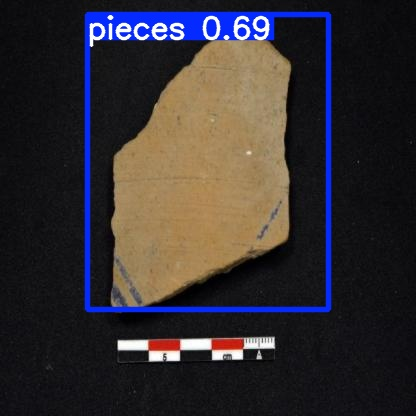

In [17]:
# 5️⃣ Display some detection results
import glob
from IPython.display import Image, display

for img in glob.glob('/content/yolov5/runs/detect/artifact_results/*.jpg')[:5]:
    display(Image(filename=img))



In [19]:
# 6️⃣ Evaluate the model (mAP, precision, recall)
!python val.py \
  --weights runs/train/artifact_yolov5/weights/best.pt \
  --data /content/yolov5/Artifacts-3/data.yaml \
  --img 416 \
  --iou 0.5 \
  --task test

val: data=/content/yolov5/Artifacts-3/data.yaml, weights=['runs/train/artifact_yolov5/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.5, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-453-geed9bc19 Python-3.12.12 torch-2.9.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/yolov5/Artifacts-3/test/labels... 6 images, 0 backgrounds, 0 corrupt: 100% 6/6 [00:00<00:00, 1108.68it/s]
test: New cache created: /content/yolov5/Artifacts-3/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:00<00:00,  1.33it/s]
                   all          6          6      0.999        0.4      0.488      0.307
                pieces          6        